In [14]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import os

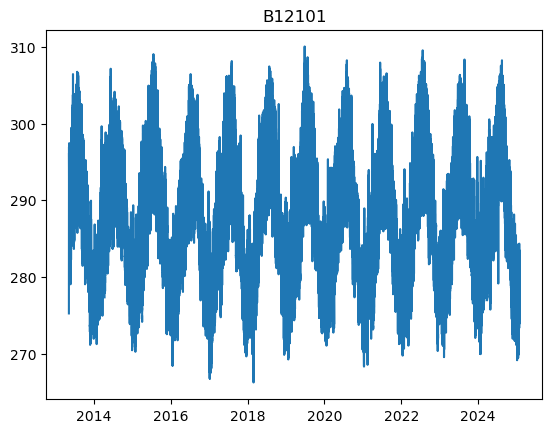

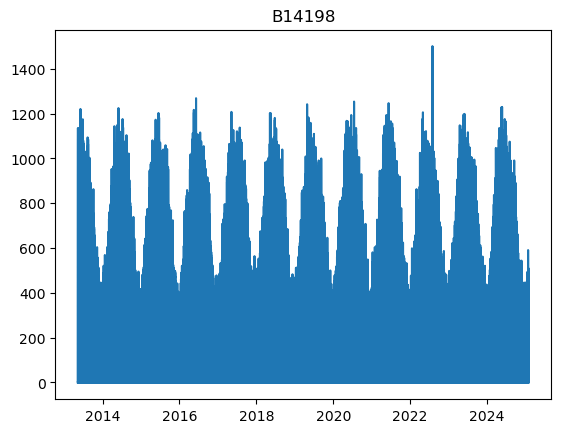

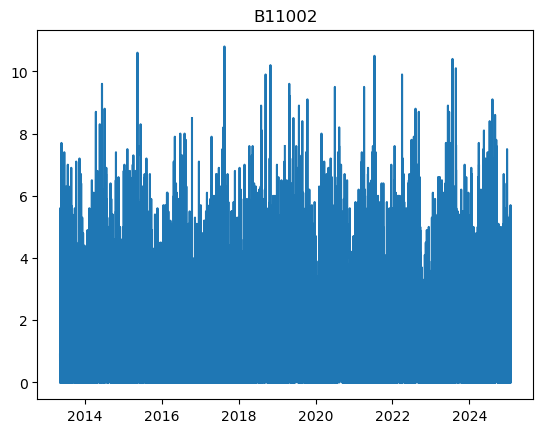

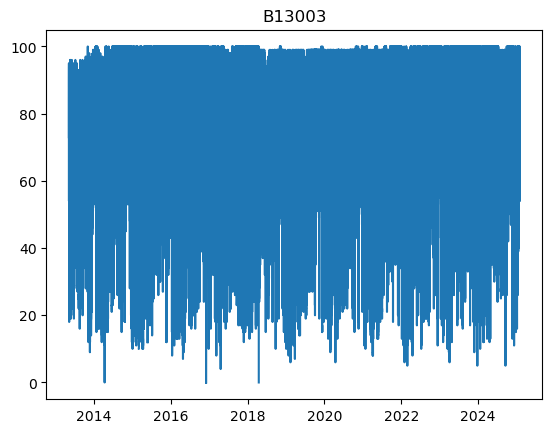

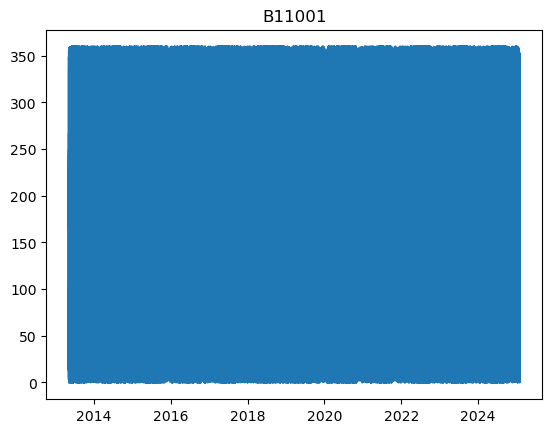

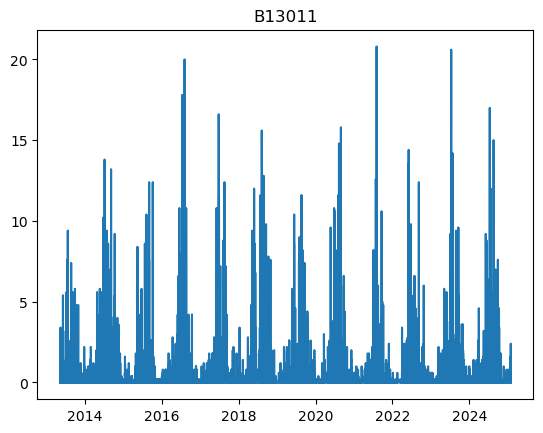

In [42]:
plot = True
folder = "data/porlezza"
dfs = []
for file in os.listdir(folder):
    if ".csv" in file:
        parameter = file.split(".")[0]
        df = pd.read_csv(os.path.join(folder, file))
        df["time"] = pd.to_datetime(df["Data-Ora"])
        df[parameter] = df[df.columns[2]]
        df = df[["time", parameter]]
        df[parameter] = df[parameter].replace(-999.0, np.nan)
        df.loc[df[parameter] > 2000, parameter] = np.nan
        df.loc[df[parameter] < -1000, parameter] = np.nan
        if parameter == "B12101":
            df["B12101"] = df["B12101"] + 273.15
        if parameter == "B11001":
            df.loc[df[parameter] > 365, parameter] = np.nan
        if plot:
            plt.plot(df["time"], df[parameter])
            plt.title(parameter)
            plt.show()
        dfs.append(df)
    
df = pd.concat([df.set_index('time') for df in dfs], axis=1).reset_index()
df = df.dropna(how='all', subset=df.columns.difference(['time']))
df = df.sort_values(by='time').reset_index(drop=True)

for param in ['B12101', 'B13003', 'B11001', 'B11002', 'B13011']:
    if param not in df.columns:
        df[param] = None

for year in range(df['time'].min().year, df['time'].max().year + 1):
    station_year_file = os.path.join(folder, "out/{}.csv".format(year))
    os.makedirs(os.path.dirname(station_year_file), exist_ok=True)
    station_year_data = df[df['time'].dt.year == year]
    station_year_data.to_csv(station_year_file, index=False)

In [41]:
df

,time,B12101,B13003,B13011,B11001,B11002
0,2016-07-05 08:10:00,297.05,NaN,0.0,None,None
1,2016-07-05 08:20:00,297.15,NaN,0.0,None,None
2,2016-07-05 08:30:00,297.55,NaN,0.0,None,None
3,2016-07-05 08:40:00,297.75,NaN,0.0,None,None
4,2016-07-05 08:50:00,297.95,NaN,0.0,None,None
...,...,...,...,...,...,...
446092,2025-01-29 23:20:00,278.75,85.0,0.0,None,None
446093,2025-01-29 23:30:00,278.65,85.5,0.0,None,None
446094,2025-01-29 23:40:00,278.55,86.1,0.0,None,None
446095,2025-01-29 23:50:00,278.45,87.3,0.0,None,None
